In [1]:
#Importing necessary libraries
import numpy as np    # numpy for calculations
import pandas as pd   # for manipulation
import sklearn as sk
import matplotlib.pyplot as plt  # for plotting of visulaisations
import seaborn as sns

In [2]:
whitewine_quality=pd.read_csv('winequality_white.csv')

In [3]:
whitewine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
whitewine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
whitewine_quality.shape

(4898, 12)

In [6]:
whitewine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
whitewine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
whitewine_quality.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [9]:
whitewine_quality.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [10]:
whitewine_quality.duplicated().describe()

count      4898
unique        2
top       False
freq       3961
dtype: object

In [11]:
whitewine_quality.drop_duplicates(inplace=True)

In [12]:
whitewine_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [13]:
whitewine_quality.duplicated().sum()

0

<Axes: >

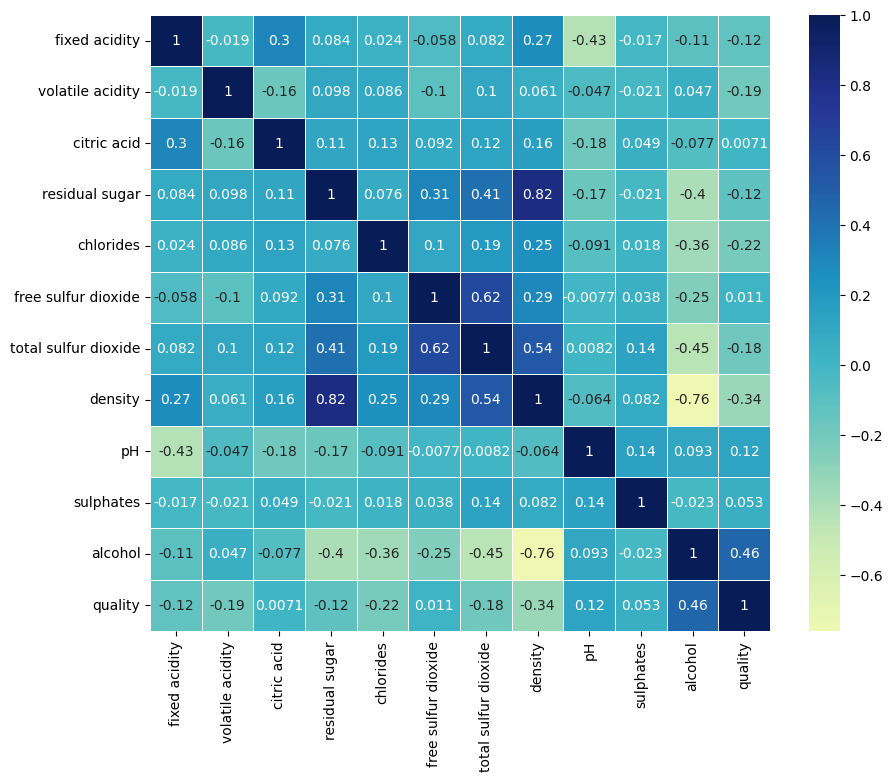

In [14]:
# Visualization of Dataset
plt.figure(figsize=(10,8))
sns.heatmap(whitewine_quality.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")

<Axes: title={'center': 'Quality of Wine'}>

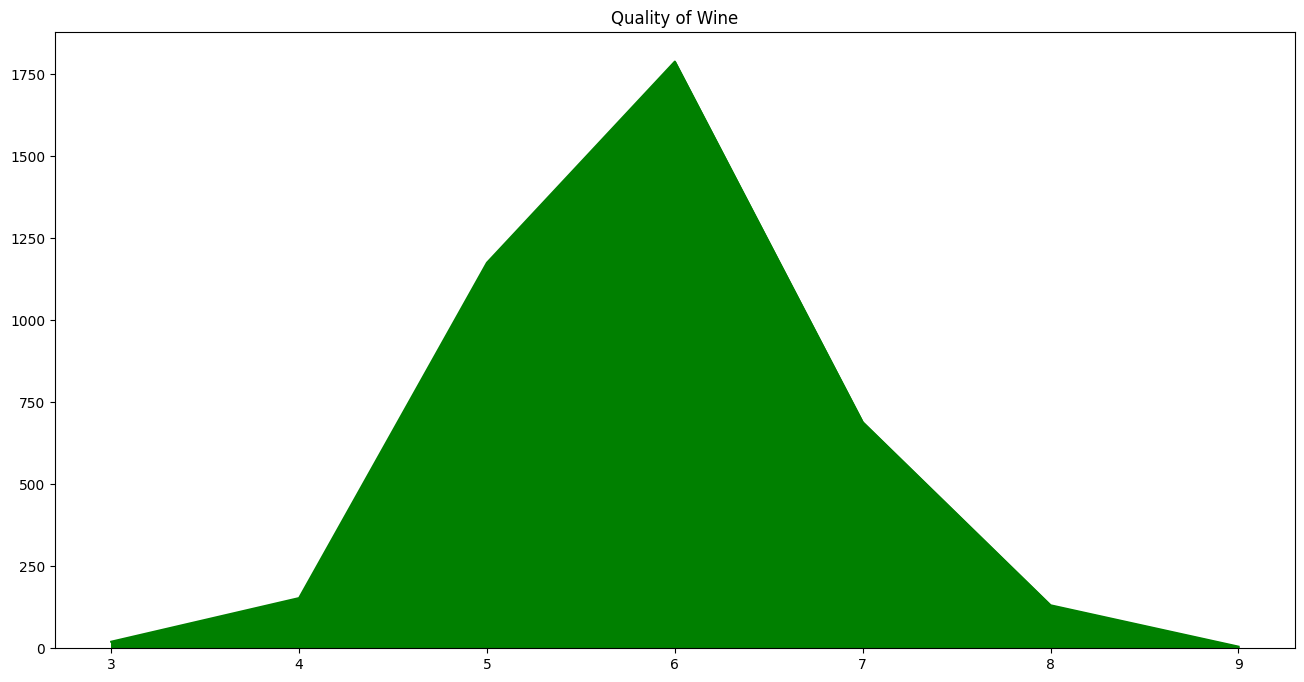

In [15]:
whitewine_quality['quality'].value_counts().sort_index().plot.area(figsize=(16,8),
title='Quality of Wine',color='green')

<Axes: xlabel='residual sugar', ylabel='quality'>

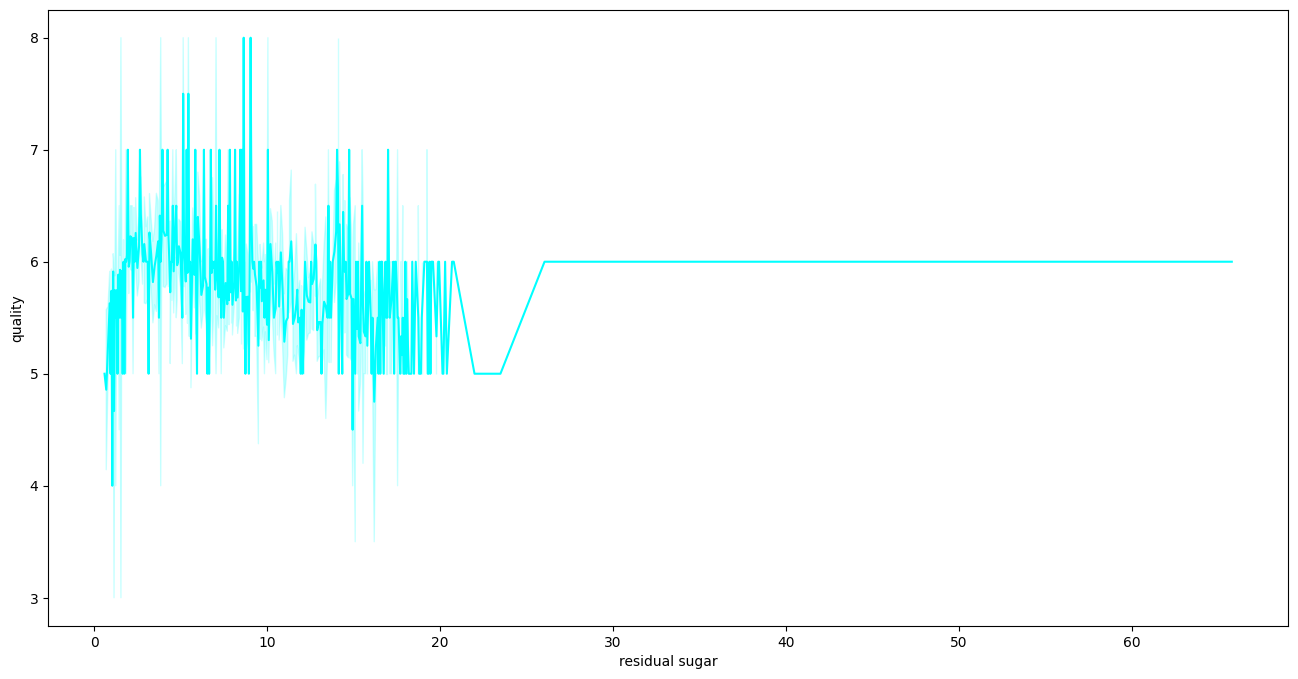

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(x='residual sugar',y='quality',data=whitewine_quality,color='cyan')

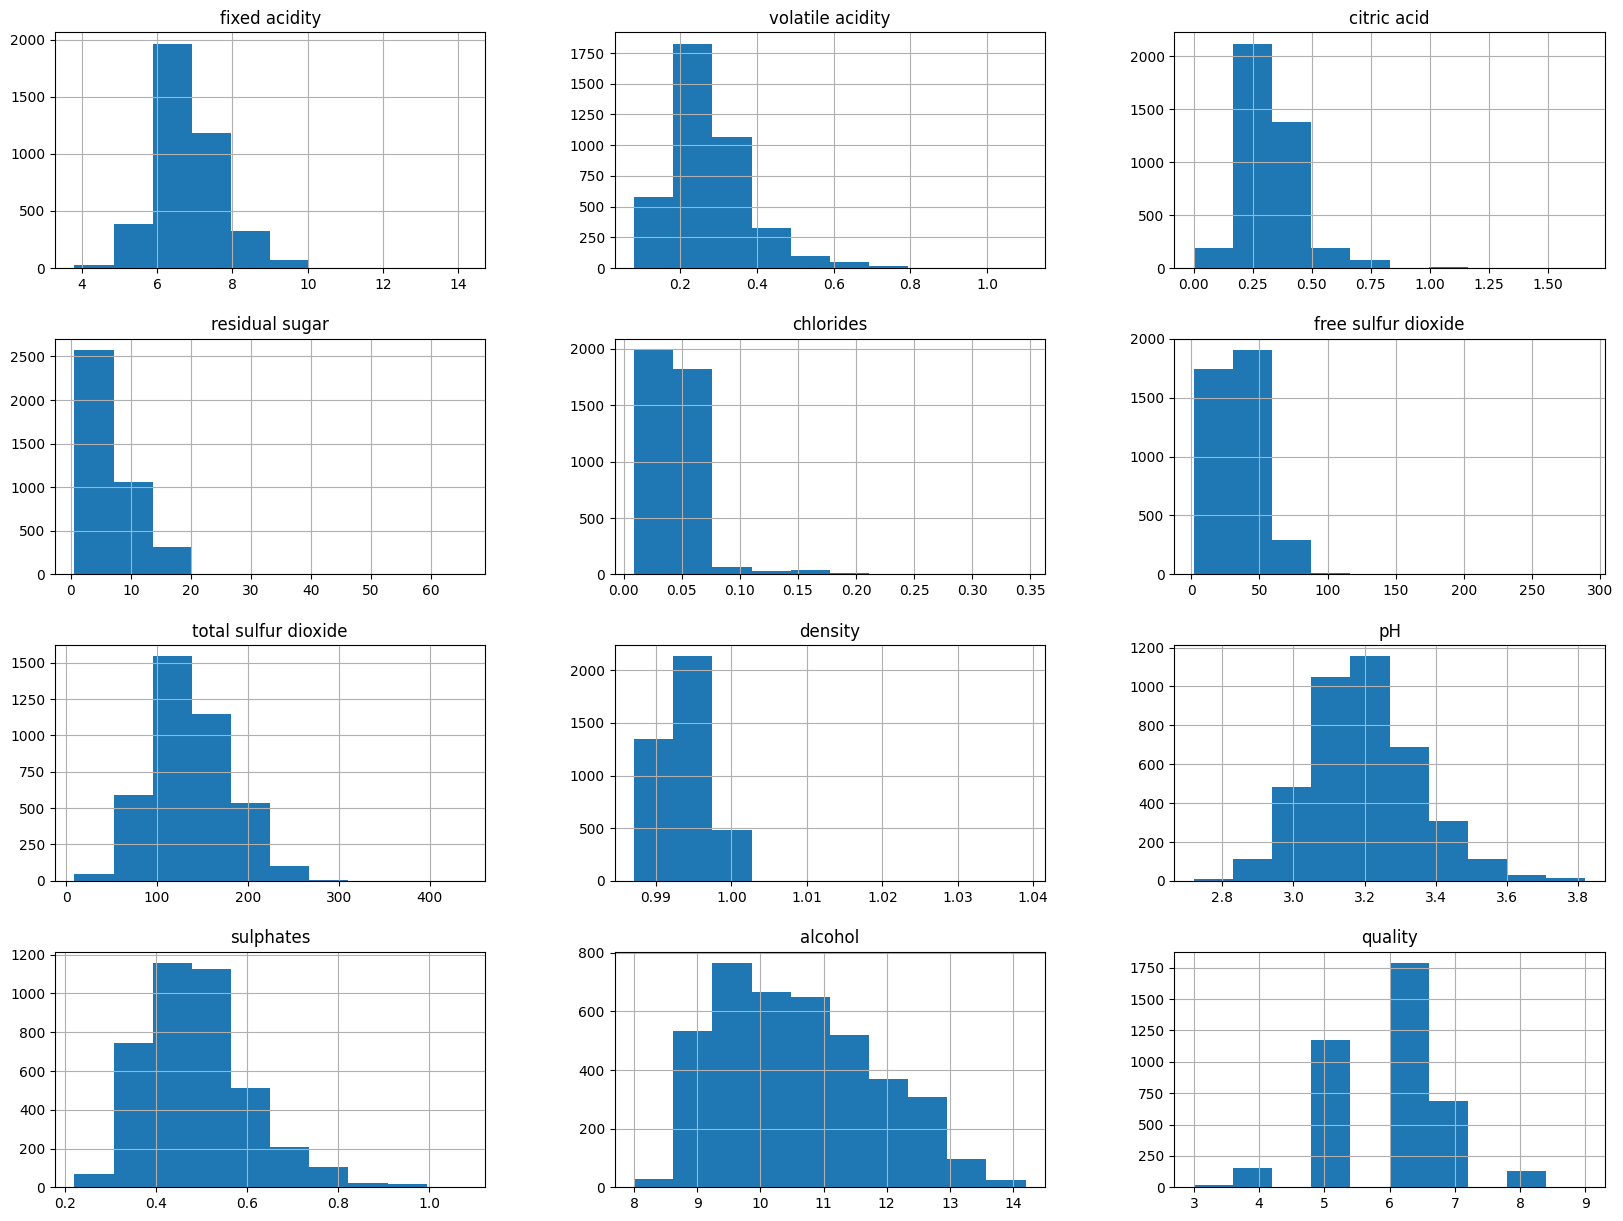

In [17]:
whitewine_quality.hist(figsize=(20,15))
plt.show()

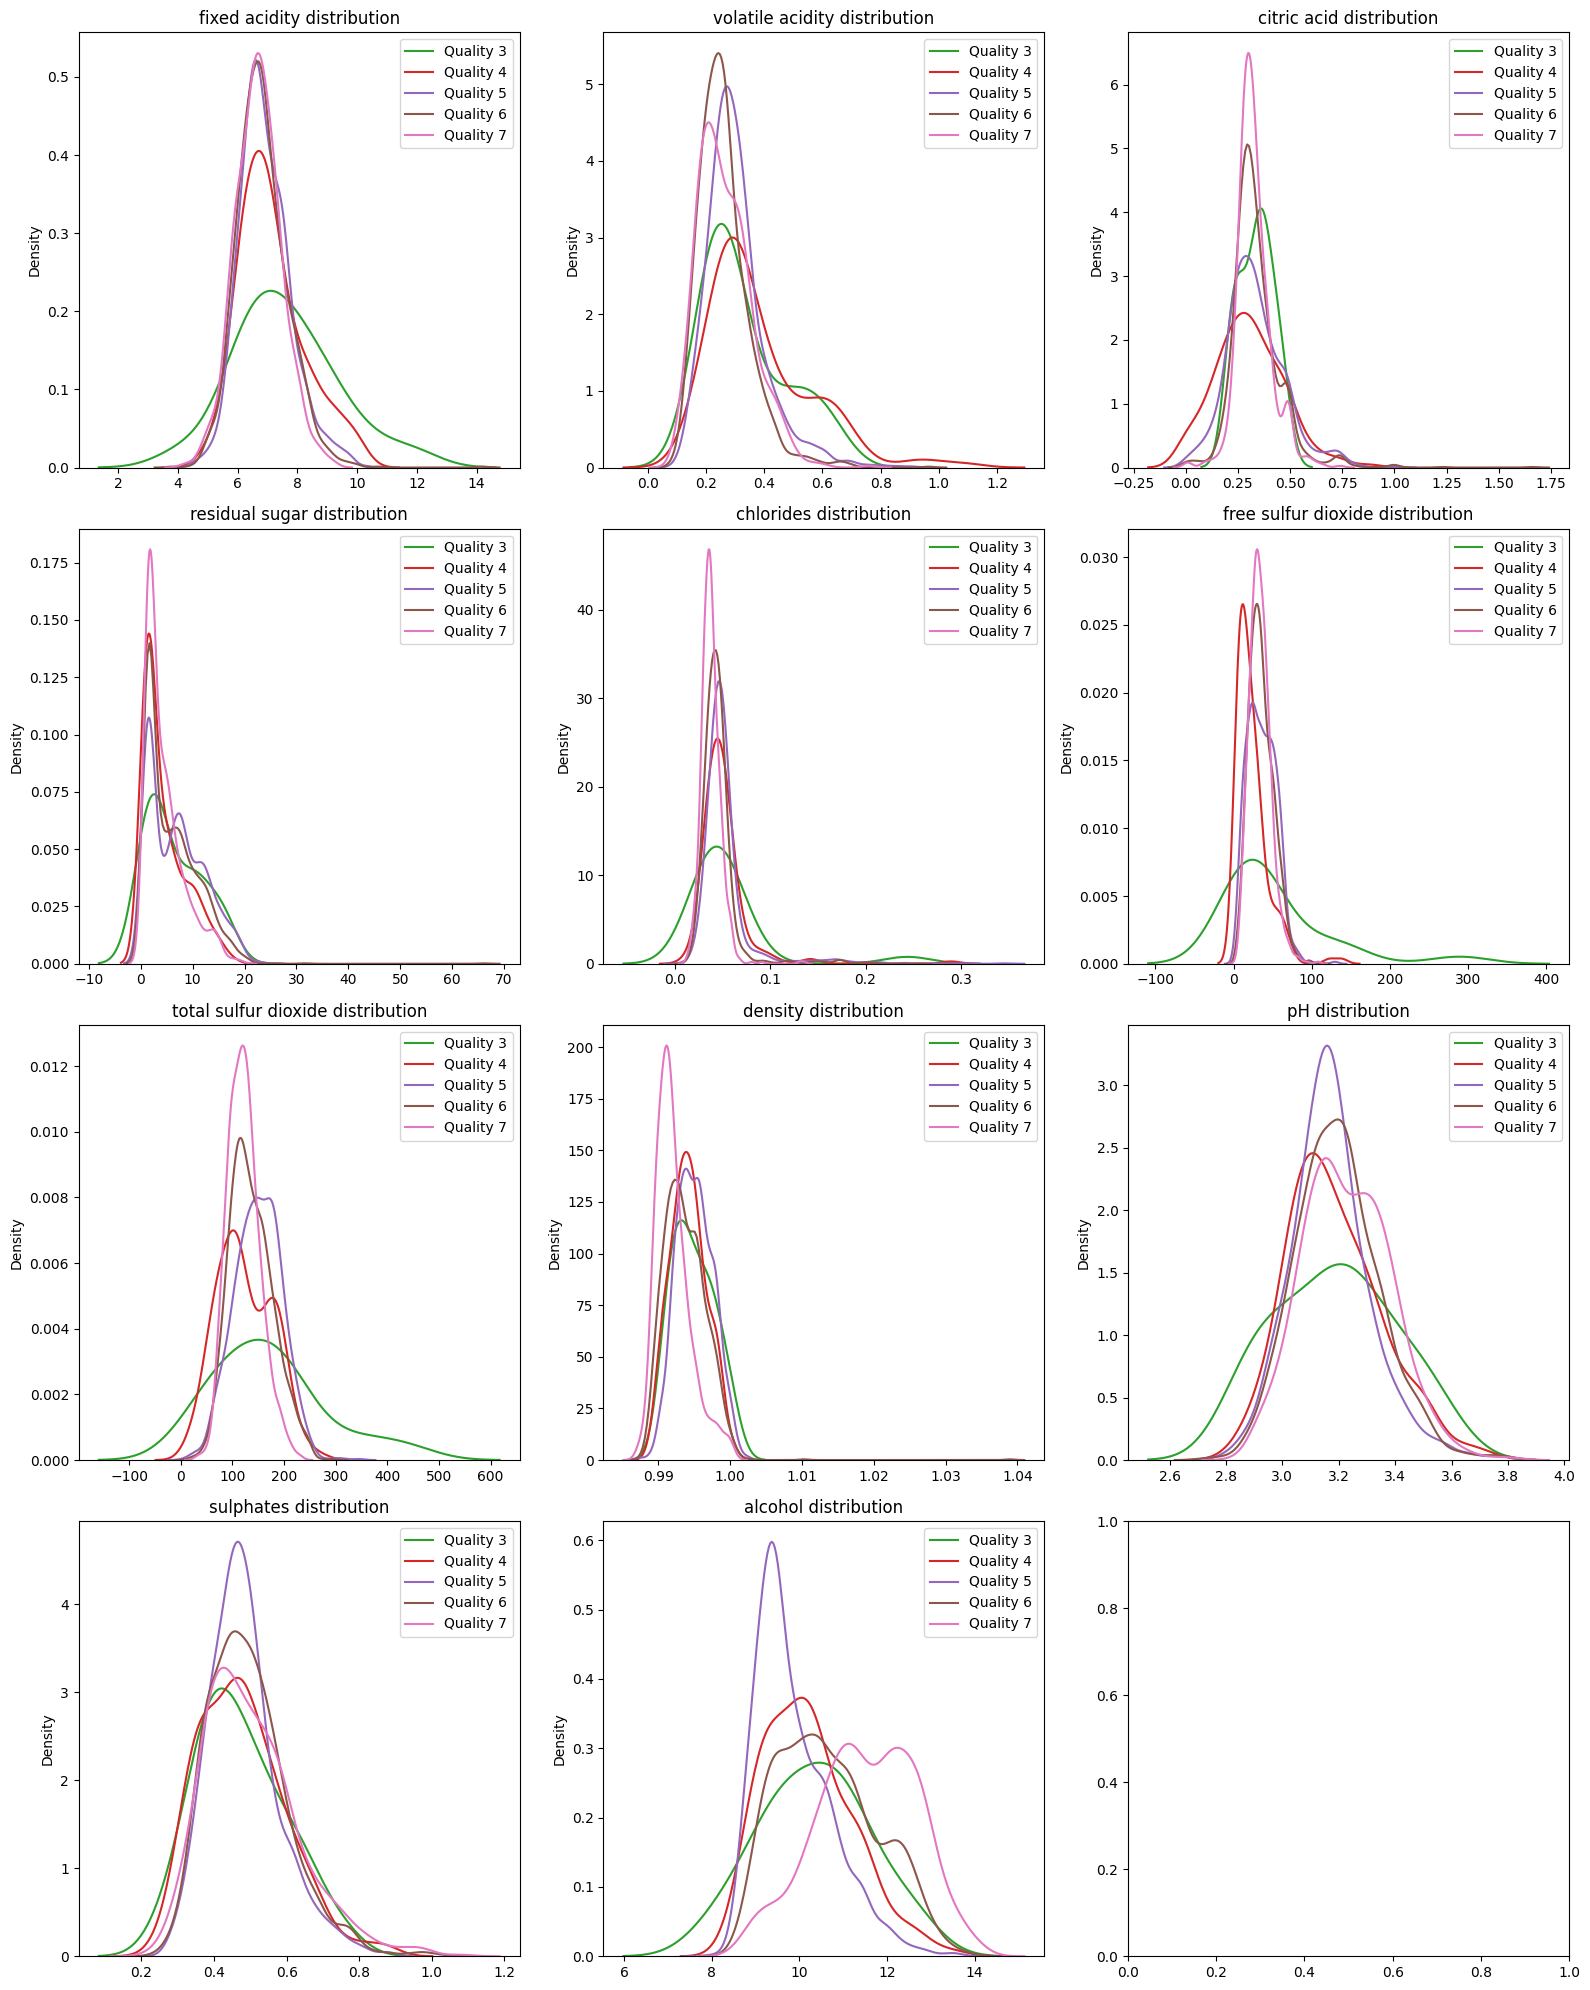

In [18]:
cols_to_draw = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']
cols = 3
rows = int(np.ceil(len(cols_to_draw) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(16, rows * 5))
ax = ax.flatten()

quality_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

for x, col in enumerate(cols_to_draw):
    for quality in range(1, 8):
        sns.kdeplot(data=whitewine_quality[whitewine_quality['quality'] == quality][col], ax=ax[x], color=quality_colors[quality - 1],
                    common_norm=False, label=f'Quality {quality}')
    ax[x].set_title(f'{col} distribution')
    ax[x].set_xlabel(None)
    ax[x].legend()

plt.tight_layout()
plt.show()

<Figure size 1600x700 with 0 Axes>

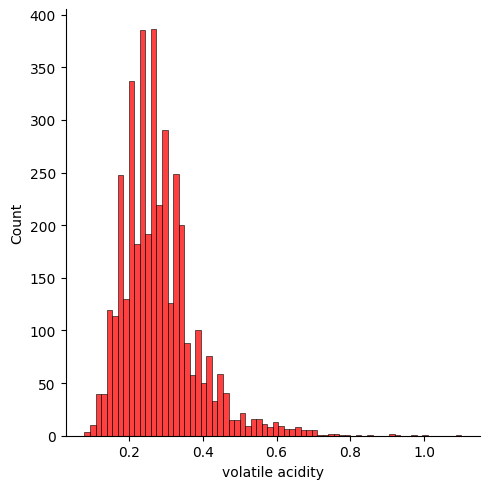

In [19]:
plt.figure(figsize=(16,7))
sns.displot(whitewine_quality['volatile acidity'],color='red')

Text(0.5, 0, 'Value')

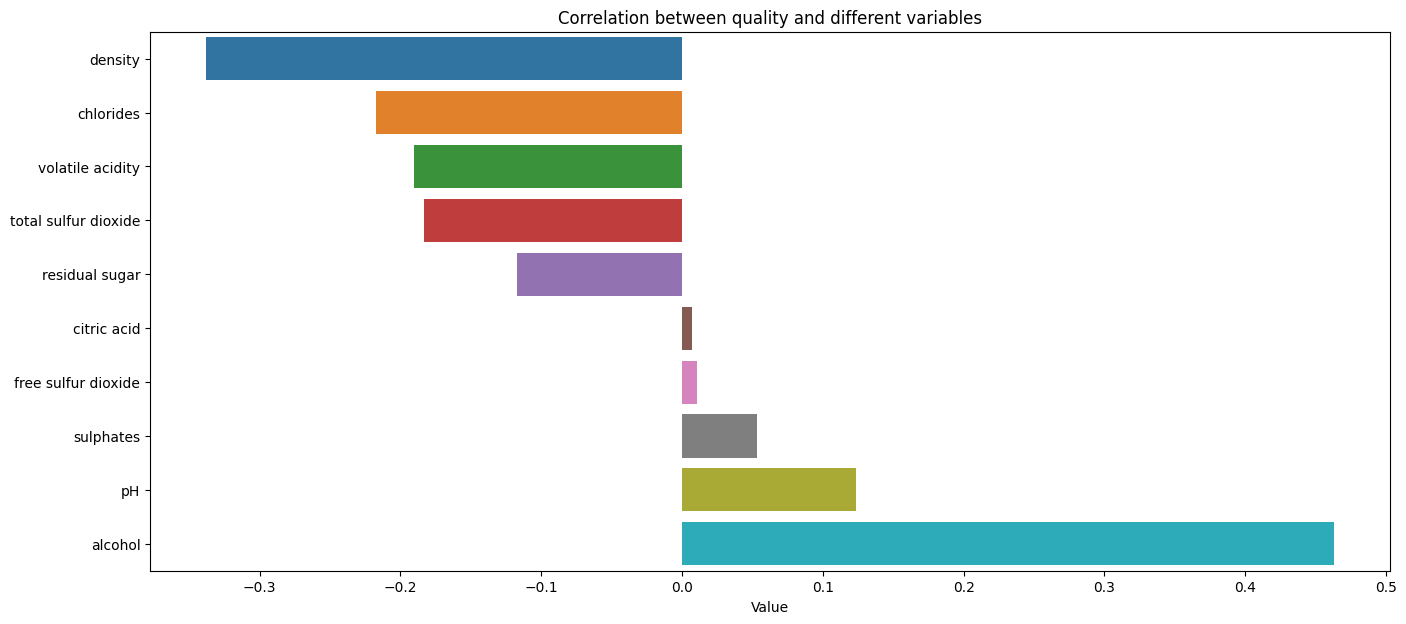

In [20]:
d_corr=whitewine_quality.corr()['quality'][1:].drop('quality',axis=0)

plt.figure(figsize=(16,7))
plt.title('Correlation between quality and different variables')
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.xlabel('Value')

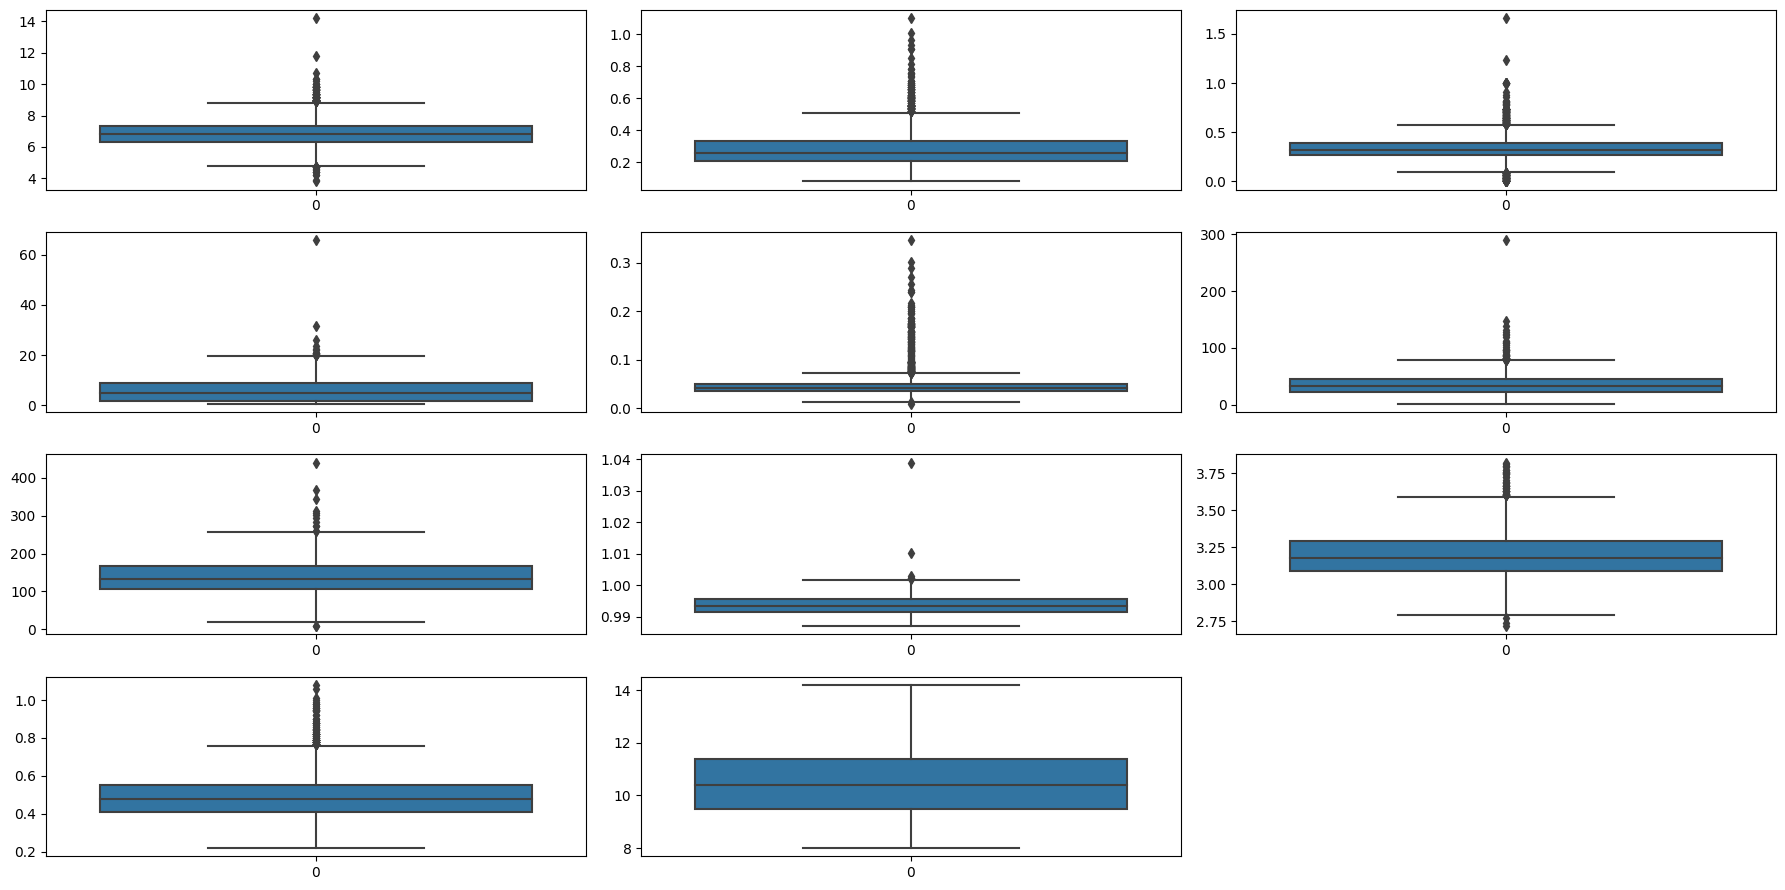

In [21]:
# Outliers
plt.figure(figsize=(18,9))
o_count=1
for i in cols_to_draw:
    plt.subplot(4,3,o_count)
    sns.boxplot(whitewine_quality[i])
    o_count=o_count+1
plt.tight_layout()

In [22]:
# Data Pre-processing

In [23]:
whitewine_quality['quality']=whitewine_quality['quality'].map({3:'Bad',4:'Bad',5:'Bad',6:'Good',7:'Good',8:'Good',9:'Good'})
whitewine_quality['quality'].value_counts()

Good    2613
Bad     1348
Name: quality, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
whitewine_quality['quality']=le.fit_transform(whitewine_quality['quality'])
whitewine_quality['quality'].value_counts()

1    2613
0    1348
Name: quality, dtype: int64

In [27]:
# Determining the input features and class feature
X=whitewine_quality.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values
y=whitewine_quality.iloc[:, 11].values

In [28]:
# Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2970, 11)
(2970,)
(991, 11)
(991,)


In [29]:
# Scaling of the features

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
# Determining the input features and class feature
X=whitewine_quality.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values
y=whitewine_quality.iloc[:, 11].values

In [31]:
# Balancing the Dataset

In [32]:
# import SMOTE oversampling and other necessary libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

In [33]:
#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=30)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({1: 1964, 0: 1006})
After oversampling:  Counter({1: 1964, 0: 1964})


In [34]:
# Modelling

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

model=LogisticRegression(max_iter=1000)
model.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression(max_iter=1000)

In [37]:
# Evaluating the Logistic Regression model

In [38]:
# predicting the test set results
y_pred_SMOTE=model.predict(X_test)
print(y_pred_SMOTE)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 

In [39]:
print(y_test)

[1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 0 1 

In [40]:
# Evaluate performance of Logistic Regression model

In [41]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred_SMOTE)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred_SMOTE)
print('Confusion Matrix:')
print(cm,'\n\n')
print('----------------------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred_SMOTE)
print('Classification Report:\n')
print(result)

accuracy:0.72


Confusion Matrix:
[[249  93]
 [187 462]] 


----------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.73      0.64       342
           1       0.83      0.71      0.77       649

    accuracy                           0.72       991
   macro avg       0.70      0.72      0.70       991
weighted avg       0.74      0.72      0.72       991



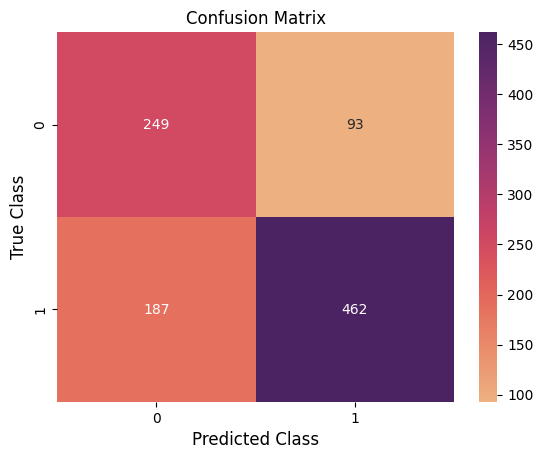

In [42]:
# Visualise the Confusion Matrix using seaborn heatmap
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()


In [43]:
# Decision Tree

In [44]:
# Import library and train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

Dmodel=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf_SMOTE = Dmodel.fit(X_train_SMOTE, y_train_SMOTE)

In [53]:
# Evaluating the Decision Tree model

In [45]:
# predicting the test set results
y_Dpred_SMOTE=Dmodel.predict(X_test)
print(y_Dpred_SMOTE)

[1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 

In [46]:
print(y_test)

[1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0
 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 0 1 

In [47]:
# Evaluate performance of the Decision Tree model

In [49]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_Dpred_SMOTE)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_Dpred_SMOTE)
print('Confusion Matrix:')
print(cm,'\n\n')
print('----------------------------------------------------------------------')
result=metrics.classification_report(y_test,y_Dpred_SMOTE)
print('Classification Report:\n')
print(result)

accuracy:0.70


Confusion Matrix:
[[197 145]
 [155 494]] 


----------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       342
           1       0.77      0.76      0.77       649

    accuracy                           0.70       991
   macro avg       0.67      0.67      0.67       991
weighted avg       0.70      0.70      0.70       991



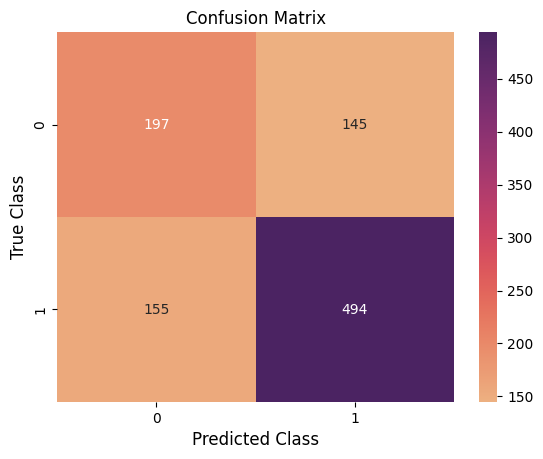

In [50]:
# Visualise the Confusion Matrix using seaborn heatmap
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

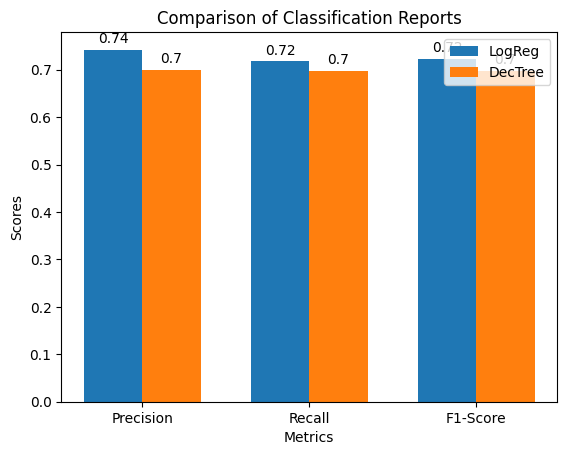

In [54]:
# Comparing Performance metrics of both models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred_SMOTE, target_names=['class_0', 'class_1'], output_dict=True)
report2 = classification_report(y_test, y_Dpred_SMOTE, target_names=['class_0', 'class_1'], output_dict=True)

precision1 = report1['weighted avg']['precision']
recall1 = report1['weighted avg']['recall']
f1_score1 = report1['weighted avg']['f1-score']

precision2 = report2['weighted avg']['precision']
recall2 = report2['weighted avg']['recall']
f1_score2 = report2['weighted avg']['f1-score']

labels = ['Precision', 'Recall', 'F1-Score']
values1 = [precision1, recall1, f1_score1]
values2 = [precision2, recall2, f1_score2]

# Plotting the bar chart
bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, values1, bar_width, label='LogReg')
bar2 = ax.bar([i + bar_width for i in index], values2, bar_width, label='DecTree')

# Adding labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Reports')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

# Show the plot
plt.show()
